<a href="https://colab.research.google.com/github/gjb117/mec2-projects/blob/main/completed/Copy_of_Student_MLE_MiniProject_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Exploratory Data Analysis

# Exploratory Data Analysis: Unveiling Insights from the NYC Taxi Dataset

Data has become the lifeblood of the modern world, permeating every aspect of our lives and transforming the way we make decisions. In this era of vast information, the ability to extract meaningful insights from raw data has emerged as a crucial skill. Enter exploratory data analysis (EDA), a powerful approach that allows us to unravel hidden patterns, detect anomalies, and generate valuable knowledge from the vast volumes of data at our disposal.

Exploratory data analysis serves as the initial step in any data-driven investigation, offering a comprehensive understanding of the dataset's structure, distributions, and relationships between variables. By applying statistical and visual techniques, analysts gain a deeper insight into the data, paving the way for more accurate predictions, informed decision-making, and the discovery of actionable insights.

To illustrate the significance of exploratory data analysis, we delve into one of the most popular and widely studied datasets in the field—the [NYC Taxi Dataset](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). As the name suggests, this dataset captures detailed information about taxi trips within the bustling city of New York. The NYC Taxi Dataset is an ideal choice for learning and practicing EDA techniques due to its richness, complexity, and real-world applicability.

The dataset encompasses a vast range of attributes, including pickup and drop-off locations, timestamps, trip durations, passenger counts, payment information, and much more. By exploring this data, we can gain valuable insights into the dynamics of taxi usage, understand travel patterns across different neighborhoods, identify peak hours of demand, analyze fare structures, and even uncover interesting anecdotes about the city's vibrant life.

The NYC Taxi Dataset is an excellent resource for aspiring ML practitioners to develop their EDA skills. Its scale, complexity, and real-world relevance make it an engaging playground for uncovering hidden patterns, generating hypotheses, and forming data-driven narratives.

In this mini project, we will dive deep into the NYC Taxi Dataset. We will leverage various EDA techniques to unveil meaningful insights, visualize data distributions, identify outliers, and pose insightful questions that will fuel further analysis and exploration. By the end of this colab, students will have a solid foundation in exploratory data analysis and be equipped to tackle real-world data challenges with confidence.

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the NYC taxi dataset into a Pandas DataFrame and do a few basic checks to ensure the data is loaded properly. Note, there are several months of data that can be used. For simplicity, use the Yellow Taxi 2022-01 parquet file [here](https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet). Here are your tasks:

  1. Load the `yellow_tripdata_2022-01.parquet` file into Pandas.
  2. Print the first 5 rows of data. Study the schema and make sure you understand what each of the fields mean by referencing the [documentation](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf).
  3. How many rows are in the dataset? How many unique columns are in the dataset?
  4. Which columns have NULL values and how many NULL values are present in each of these columns?
  5. Generate summary statistics using Pandas' [describe method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.  
  6. Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.


In [ ]:
# Load parquet file into a Pandas DataFrame
raw = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet")

In [ ]:
# Display the first few rows of the dataset
raw.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [ ]:
# Display the shape of the dataset
print('shape:', raw.shape)
print('raw row count: ', raw.shape[0])
print('raw col count: ', raw.shape[1])

shape: (2463931, 19)
raw row count:  2463931
raw col count:  19


In [ ]:
# Display shape of dataset (cont'd)

# confirm columns unique with no dups
cols = raw.columns.unique().to_list()
print('no duplicate cols?', raw.columns.is_unique)
print('confirm uniqueness wiuth (set diff):', len(set(raw.columns.to_list()).difference(set(cols))))

# unique col count and names
print('unique col count: ', len(cols))
print('unique cols:')
display(cols)

no duplicate cols? True
confirm uniqueness wiuth (set diff): 0
unique col count:  19
unique cols:


['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [ ]:
# Display shape of dataset (cont'd)
# Check for missing values
print('NULL counts by col:')
print(raw.isnull().sum())

print("\n" + "list of cols with NULL:")
print(raw.columns[raw.isnull().any()].to_list())

NULL counts by col:
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

list of cols with null:
['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee']


In [ ]:
# Summary statistics of the dataset
raw.describe().round(3)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2463931.000,2392428.000,2463931.000,2392428.000,2463931.000,2463931.000,2463931.000,2463931.000,2463931.000,2463931.000,2463931.000,2463931.000,2463931.000,2463931.000,2392428.000,2392428.000
mean,1.708,1.389,5.373,1.416,166.077,163.581,1.194,12.946,1.007,0.491,2.386,0.375,0.297,19.169,2.282,0.082
std,0.502,0.983,547.871,5.918,65.468,70.790,0.500,255.815,1.236,0.083,2.831,1.681,0.044,255.964,0.743,0.313
min,1.000,0.000,0.000,1.000,1.000,1.000,0.000,-480.000,-4.500,-0.500,-125.220,-31.400,-0.300,-480.300,-2.500,-1.250
25%,1.000,1.000,1.040,1.000,132.000,113.000,1.000,6.500,0.000,0.500,0.720,0.000,0.300,11.300,2.500,0.000
50%,2.000,1.000,1.740,1.000,162.000,162.000,1.000,9.000,0.500,0.500,2.000,0.000,0.300,14.690,2.500,0.000
75%,2.000,1.000,3.130,1.000,234.000,236.000,1.000,14.000,2.500,0.500,3.000,0.000,0.300,20.020,2.500,0.000
max,6.000,9.000,306159.280,99.000,265.000,265.000,5.000,401092.320,33.500,16.590,888.880,193.300,0.300,401095.620,2.500,1.250


- **Unusual Findings:**
  - The `trip_distance` has a maximum value of `306,159.28` miles, highly implausible for a single taxi trip.
  - `fare_amount` shows a maximum of `401,092.32`, extraordinarily high for taxi services.
  - Negative values in `fare_amount`, such as `-480.00`, suggesting transactions were reversed or refunded.
  - The `tip_amount` includes a maximum of `888.88`, which, while possible, is significantly higher than typical tipping behavior.

- **Hypotheses:**
  - The anomaly in `trip_distance` and `fare_amount` could be due to data entry errors, such as misplaced decimal points or incorrect data aggregation.
  - The negative `fare_amount` values might indicate a refund process for cancelled trips or adjustments, reflecting operational aspects of taxi services rather than data errors.
  - The exceptionally high `tip_amount` could suggest instances of extremely generous tipping or possibly a misclassification of charges; it might also reflect special circumstances, such as a very long or outstanding service, rather than being an error.


In [ ]:
# Drop rows with missing values.
df = raw.dropna().reset_index(drop=True)
display(df)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392423,1,2022-01-31 23:24:28,2022-01-31 23:32:47,1.0,1.50,1.0,N,163,143,2,7.5,3.0,0.5,0.00,0.0,0.3,11.30,2.5,0.0
2392424,2,2022-01-31 23:17:44,2022-01-31 23:22:05,1.0,1.02,1.0,N,249,68,1,5.5,0.5,0.5,1.86,0.0,0.3,11.16,2.5,0.0
2392425,2,2022-01-31 23:26:41,2022-01-31 23:34:54,1.0,1.53,1.0,N,68,90,1,8.0,0.5,0.5,2.95,0.0,0.3,14.75,2.5,0.0
2392426,2,2022-01-31 23:37:41,2022-01-31 23:45:26,1.0,1.59,1.0,N,90,79,1,7.5,0.5,0.5,2.26,0.0,0.3,13.56,2.5,0.0


In [ ]:
# safety check
display(df.isnull().sum())
# print()
# display(len(raw.index.difference(df.index).to_list()))
# display(raw.shape[0] - df.shape[0])

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
trip_duration            0
pickup_hour              0
pickup_day               0
dtype: int64

Feature engineering is a critical process in machine learning that involves selecting, transforming, and creating features from raw data to improve the performance and accuracy of predictive models. While machine learning algorithms have the capability to automatically learn patterns from data, the quality and relevance of the features used as inputs greatly influence the model's ability to generalize and make accurate predictions. Feature engineering, therefore, plays a crucial role in extracting meaningful information and representing it in a format that best captures the underlying relationships within the data.

Here are your tasks:

  1. Create a new feature that calculates the trip duration in minutes.
  2. Create additional features for the pick-up day of week and pick-up hour.
  3. Use the Seaborn library to create a [line plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) depicting the number of trips as a function of the hour of day. What's the busiest time of day?
  4. Create another lineplot depicting the number of trips as a function of the day of week. What day of the week is the least busy?

In [ ]:
# Create a new column for trip duration in minutes
df['trip_duration'] = round((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60, 3)
# Drop rows with negative duration
df.drop(index=(df[df.trip_duration < 0]).index, inplace=True)
# Reset the index
df.reset_index(drop=True, inplace=True)
# preview before cleaning
df['trip_duration'].head()

0    17.817
1     8.400
2     8.967
3    10.033
4    37.533
Name: trip_duration, dtype: float64

In [ ]:
# confirm removal of negative duration trips
print('negative duration trips', df[df.trip_duration < 0].shape[0])
print('total trips', df.shape[0])

negative duration trips 0
total trips 2392427


In [ ]:
# preview new col
df['trip_duration'].head(10)

0    17.817
1     8.400
2     8.967
3    10.033
4    37.533
5    29.550
6    14.133
7     9.683
8    14.783
9     4.600
Name: trip_duration, dtype: float64

In [ ]:
# Create new columns for pickup hour and day of week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
# preview new cols
display(df[['pickup_hour', 'pickup_day']].head(10))

In [ ]:
# pickup_day value counts
df['pickup_day'].value_counts()

Monday       363817
Saturday     352417
Friday       350891
Thursday     346565
Sunday       331893
Wednesday    330436
Tuesday      316408
Name: pickup_day, dtype: int64

In [ ]:
# preview basic head/tail, basic stats
cts = df['pickup_hour'].value_counts()
# head/tail
print('head')
print(cts.head(6), end="\n\n")
print('tail')
print(cts.tail(6), end="\n\n")
# min/max/mean
print(f"max: {cts.max()}, day {cts[cts == cts.max()].index[0]}")
print(f"min: {cts.min()}, day {cts[cts == cts.min()].index[0]}")
print(f"mean: {cts.mean().round(2)}", end="\n\n")
# rest basic stats
# cts.describe().round(2)

head
18    172507
17    172256
15    170568
16    164751
14    160138
19    147191
Name: pickup_hour, dtype: int64

tail
1    40334
6    34149
2    27789
3    18439
5    13608
4    11966
Name: pickup_hour, dtype: int64

max: 172507, day 18
min: 11966, day 4
mean: 99684.46



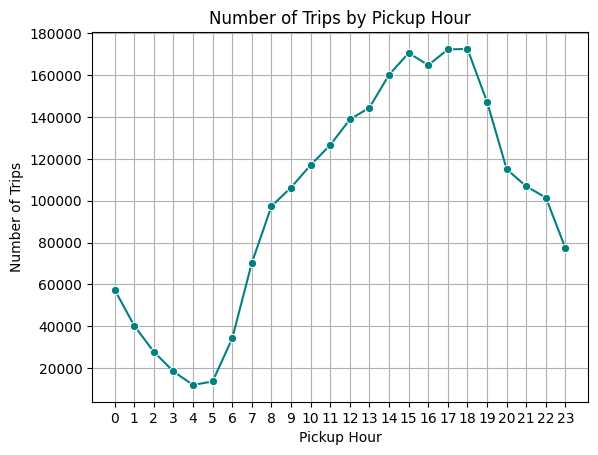

In [ ]:
# Create a lineplot displaying the number of trips by pickup hour

# aggregate data by `pickup_hour`
trips_by_hour = df.groupby('pickup_hour').size()
# move `pickup_hour` to column and rename series value as `count`
counts_df = trips_by_hour.reset_index(name='count')
# safety check ensure df is sorted by 'pickup_hour` (ascend)
counts_df_sorted = counts_df.sort_values('pickup_hour')

# plot with seaborn
sns.lineplot(data=counts_df_sorted, x='pickup_hour', y='count', marker='o', color='teal')
plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)

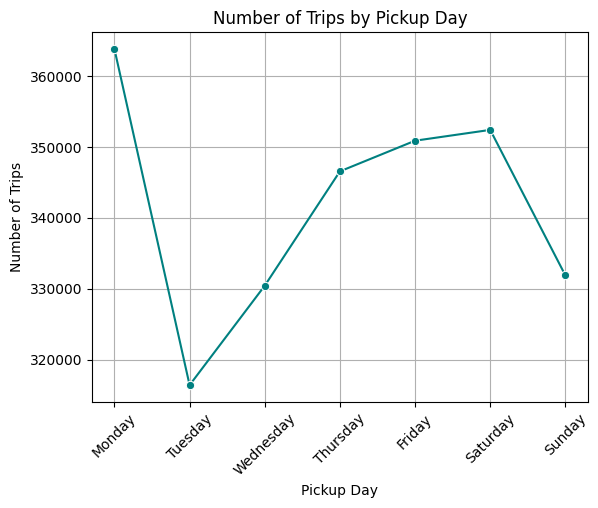

In [ ]:
# Create a lineplot displaying the number of trips by pickup day

# confirm days of week correctly ordered
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day = df.groupby('pickup_day').size().reindex(days_order).reset_index(name='count')

# render lineplot for the number of trips by pickup day
sns.lineplot(data=trips_by_day, x='pickup_day', y='count', marker='o', color='teal')
plt.title('Number of Trips by Pickup Day')
plt.xlabel('Pickup Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45) # readability
plt.grid(True)

In the realm of machine learning, understanding the relationships between variables is crucial for building accurate and effective predictive models. One powerful tool for exploring these relationships is the correlation matrix. A correlation matrix provides a comprehensive overview of the pairwise correlations between variables in a dataset, allowing practitioners to quantify and visualize the strength and direction of these associations. This matrix is an essential component of exploratory data analysis and offers several key benefits:

1. Relationship Assessment: The correlation matrix provides a quantitative measure of the relationship between variables. By calculating correlation coefficients, typically using methods like Pearson's correlation coefficient, analysts can determine if variables are positively correlated (increase together), negatively correlated (one increases as the other decreases), or uncorrelated (no systematic relationship). These measures offer insights into the direction and strength of the relationships, helping to identify important variables that may influence the target variable.

2. Feature Selection: Correlation matrices are invaluable in feature selection, which involves identifying the most relevant variables for building predictive models. By examining the correlations between the target variable and other features, analysts can identify highly correlated variables that may be strong predictors. This knowledge enables informed decisions regarding which variables to include in the model, potentially reducing dimensionality, enhancing model efficiency, and preventing issues such as multicollinearity.

3. Multicollinearity Detection: Multicollinearity occurs when two or more independent variables in a model are highly correlated. This can lead to problems such as instability in coefficient estimates, difficulty in interpreting feature importance, and reduced model robustness. By examining the correlation matrix, analysts can identify highly correlated variables and make informed decisions about which ones to include or exclude to mitigate multicollinearity. Removing redundant variables improves model interpretability and generalization.

Here is your task:

  1. Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and use Seaborn to create a heatmap of the results. Which variables are strongly correlated?

,trip_distance,fare_amount,tip_amount,total_amount,trip_duration
trip_distance,1.000000,0.039426,0.491978,0.048724,0.166055
fare_amount,0.039426,1.000000,0.024196,0.999878,0.008144
tip_amount,0.491978,0.024196,1.000000,0.038133,0.086279
total_amount,0.048724,0.999878,0.038133,1.000000,0.009731
trip_duration,0.166055,0.008144,0.086279,0.009731,1.000000


<Axes: >

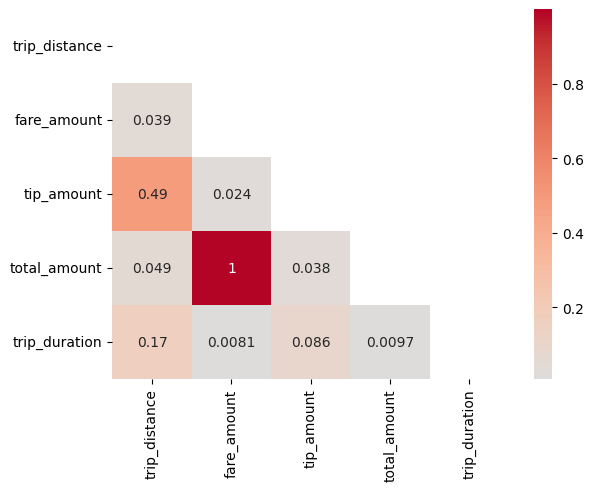

In [ ]:
# Compute correlation matrix of numerical variables
import numpy as np

# compute matrix with .corr()
numerical_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']
correlation_matrix = df[numerical_cols].corr()
# preview raw
display(correlation_matrix)

# create a heatmap of the correlation matrix, remove redundant cells
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)

### Noteable Correlations from Matrix, Heatmap

- `fare_amount` and `total_amount` (1.0):
   - Expected, as total amount includes fare amount and other charges.
   - Not useful for predictive modeling due to redundancy, but maybe for data integrity checks.
- `tip_amount` and `fare_amount` (0.49):
   - Expected, as tips are often a percentage of the fare.
   - Correlation is not very strong due to varying tipping habits among passengers.
   - Could be useful for predicting tip amounts or understanding tipping behaviors.
- `trip_distance` and `trip_duration` (0.17):
   - Expected, as trip duration can influence distance.
   - Weak correlation due to factors like traffic and route choice.
   - Could be useful for predicting trip duration or distance, but may not be very reliable.
- `tip_amount` and `trip_duration` (0.086):
   - Expected, as longer trips might result in higher tips.
   - Very weak correlation, suggesting trip duration is not a strong predictor of tip amount.
   - Could be useful for understanding if longer trips result in higher tips.




---



Pairplots, also known as scatterplot matrices, allow for the visualization of pairwise relationships between multiple variables simultaneously. Each subplot in the pairplot represents the scatterplot of one variable against another. Pairplots offer several advantages in EDA:

  - Variable Relationships: Pairplots enable analysts to explore the relationships between variables, revealing patterns such as linear or nonlinear correlations, clusters, or other associations. These visual cues guide further analysis, feature selection, or modeling decisions.

  - Multivariate Analysis: Pairplots help identify multivariate dependencies and interactions, highlighting how different variables jointly influence one another. This is particularly valuable in identifying potential confounding factors or discovering hidden interactions that may not be apparent when considering variables in isolation.

  - Outlier Detection: Pairplots can reveal potential outliers by showing data points that deviate significantly from the general pattern observed between variables. Outliers can indicate data anomalies or influential observations that may impact model performance.

  - Feature Importance: Pairplots provide an intuitive representation of the relative importance of different features. Variables exhibiting strong correlations or clear patterns may be more relevant for predictive modeling or feature selection.

  - Data Quality: Pairplots can help identify data quality issues, such as data entry errors or measurement inconsistencies. Patterns that do not align with expectations or exhibit unusual trends may signal data problems that require further investigation or preprocessing.

Here is your task:

  1. Create a [pairplot matrix](https://seaborn.pydata.org/generated/seaborn.pairplot.html) using Seaborn to observation the relationship between the following variables: trip_distance, fare_amount, tip_amount, total_amount, trip_duration. Note, pairplots can be memory intensive. Try sampling the dataset using the [sample method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) in Pandas. Which variables appear to have a strong relationship? Which variables seem to have no relationship?

## **Basic and Log-Transformed Pair-Plot and KDE**

In [ ]:
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.

# cols to include in the pairplot
cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']
# Sample the dataset
df_sample = df.sample(frac=0.2, random_state=1)

# Create copies of the dataframe for the log-transformed and normalized data
df_sample_log = df_sample.copy()
df_sample_norm = df_sample.copy()

# Apply a logarithmic transformation to the variables in the log-transformed copy
df_sample_log[cols] = np.log1p(df_sample_log[cols])

### **Basic Pair-Plot and KDE (No Log Transform)**

<Figure size 600x600 with 0 Axes>

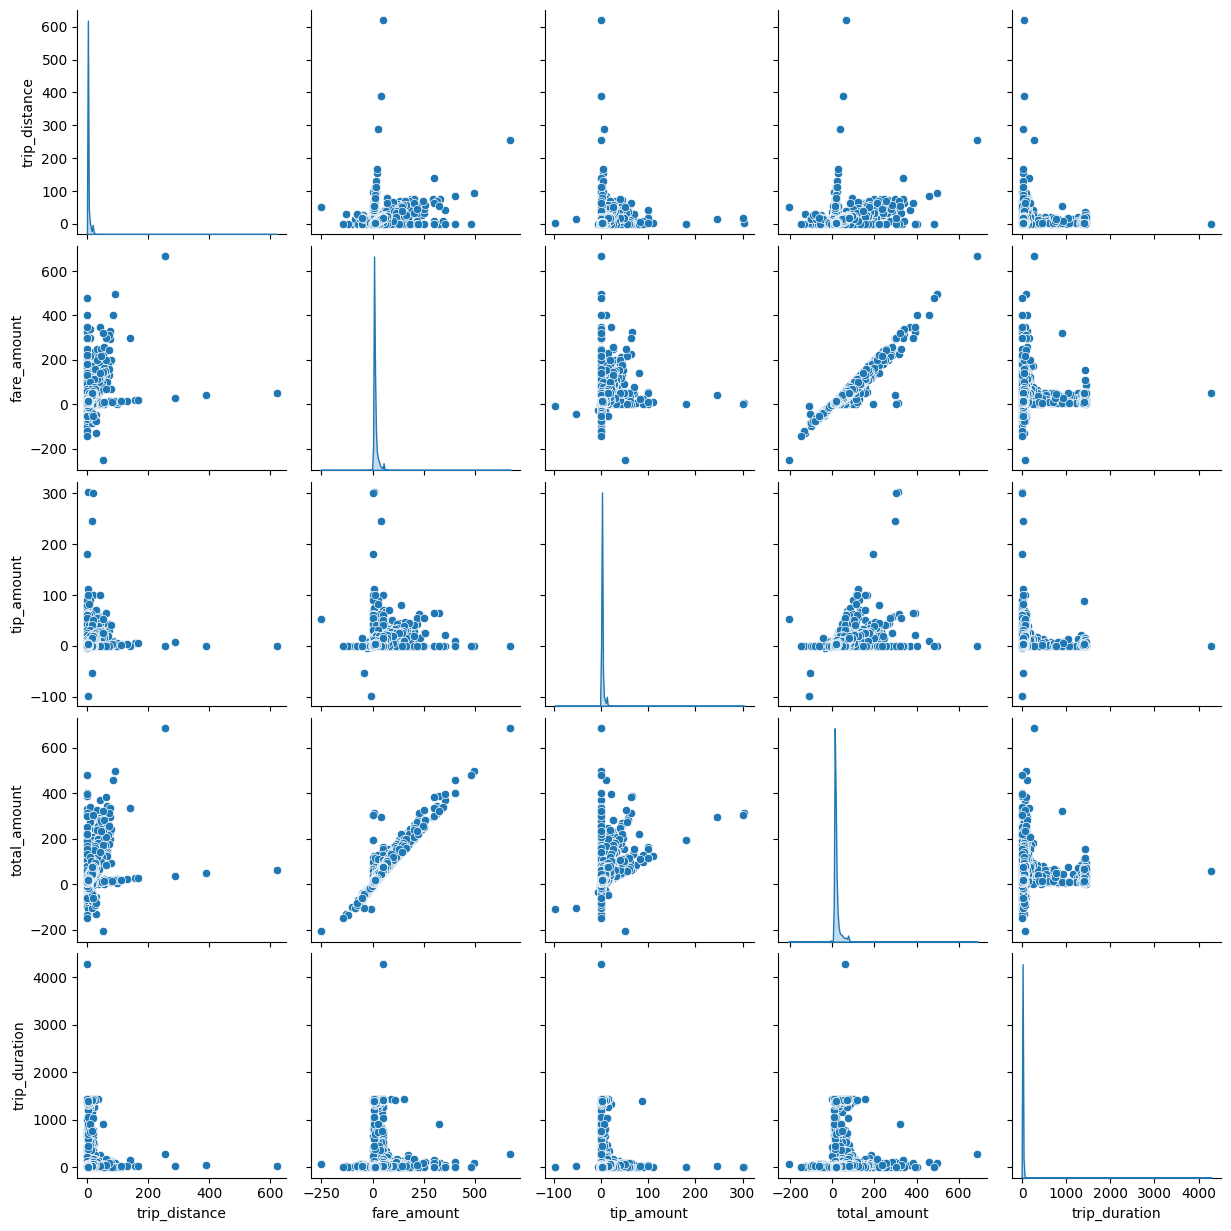

In [ ]:
# Create a scatter plot matrix of numerical variables (cont'd)

# original pairplot
plt.figure(figsize=(6, 6))
sns.pairplot(df_sample[cols], diag_kind='kde')
plt.tight_layout()

### **Log-Transformed Pair-Plot and KDE**


<Figure size 600x600 with 0 Axes>

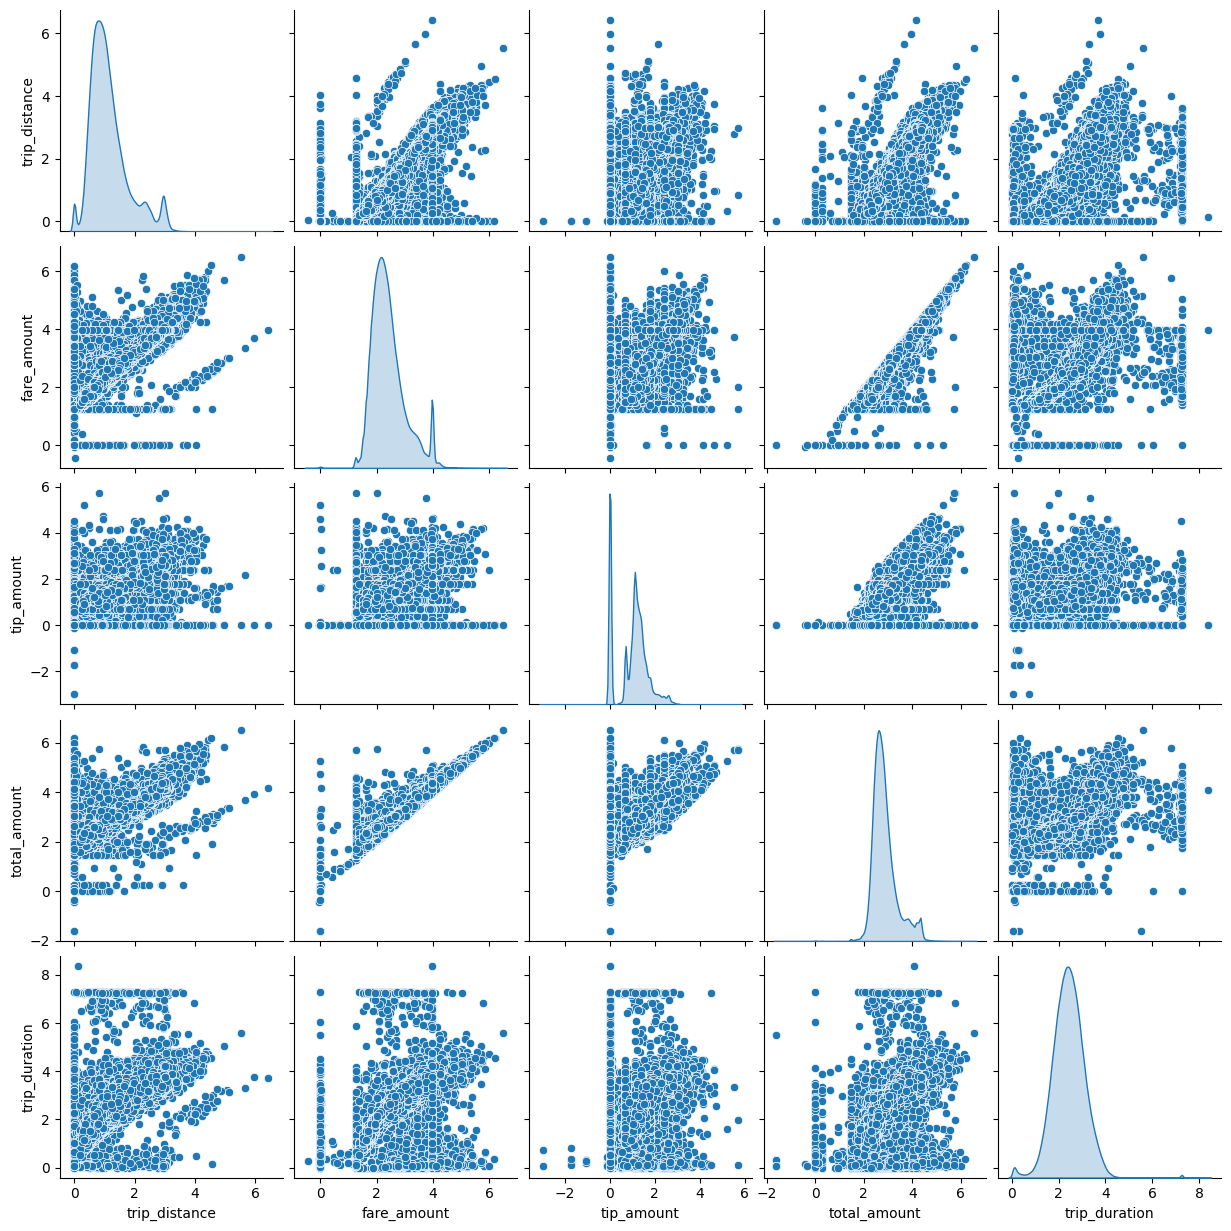

In [ ]:
# Create a scatter plot matrix of numerical variables (cont'd)

# log-transformed pairplot
plt.figure(figsize=(6, 6))
sns.pairplot(df_sample_log[cols], diag_kind='kde')
plt.tight_layout()

## Pairplot Analysis

  
- **Strong Relationships**:
  - `trip_distance` and `fare_amount`: Clearly positive correlation, indicating that as trip distance increases, so does the fare.
  - `fare_amount` and `total_amount`: Almost perfect correlation since total amount includes the fare by definition.

- **Moderate to Weak Relationships**:
  - `tip_amount` and `fare_amount`: Visible positive trend, but scattered, reflecting a moderate relationship.
  - `tip_amount` and `total_amount`: Similarly moderate relationship with greater variability.

- **No Apparent Relationship**:
  - `trip_duration`: Shows no strong relationship with `trip_distance`, `fare_amount`, or `tip_amount` in the pairplot, suggesting other factors influence duration.

- **Clusters and Observations**:
  - Clusters in `tip_amount` indicate standard tipping behaviors or instances of no tips.
  - Outliers in `fare_amount` and `total_amount` suggest anomalies or potentially long-distance trips.
  - A concentration of points near the origin in `trip_distance` vs. `trip_duration` suggests that most trips are brief and occur over short distances.


- Strong correlations are present between distance-related charges, while tip-related correlations are less consistent.
- Trip duration appears to be independent of the other variables in this dataset, with no clear correlation observed.



---



A count plot is a type of categorical plot that displays the number of occurrences of each category in a dataset. It is particularly useful for visualizing the distribution and frequency of categorical variables. Here are some key uses and benefits of count plots:

  - Categorical Variable Exploration: Count plots provide a quick and concise summary of the distribution of categorical variables. They allow analysts to understand the frequency or count of each category, revealing the proportions and imbalances within the dataset. This information is crucial for gaining insights into the composition and characteristics of categorical variables.

  - Class Imbalance Assessment: In classification tasks, count plots help assess the balance or imbalance of different target classes. It provides a visual representation of the distribution of classes, highlighting any significant discrepancies in the sample sizes across categories. Identifying imbalanced classes is important in machine learning as it can affect model performance and bias the predictions towards the majority class.

  - Data Quality Inspection: Count plots can be utilized to detect data quality issues in categorical variables. It allows analysts to identify unexpected or erroneous categories that may indicate data entry errors, missing data, or inconsistencies in the dataset. By observing the counts for each category, anomalies or discrepancies can be easily spotted, enabling data cleaning or further investigation if necessary.

  - Feature Importance Evaluation: Count plots can provide insights into the importance or relevance of different categorical features in relation to the target variable. By visualizing the distribution of categories within each class or target level, analysts can determine which categories are more prevalent or have higher frequencies for specific outcomes. This understanding helps in assessing the discriminatory power of categorical features and their potential impact on predictive models.

Here is your task:

  1. Use Seaborn to create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) for the variables PULocationID, and DOLocationID. Keep only the top 15 pick-up and drop-off locations. What's the most popular pick-up location?

The most popular pick-up location is 237




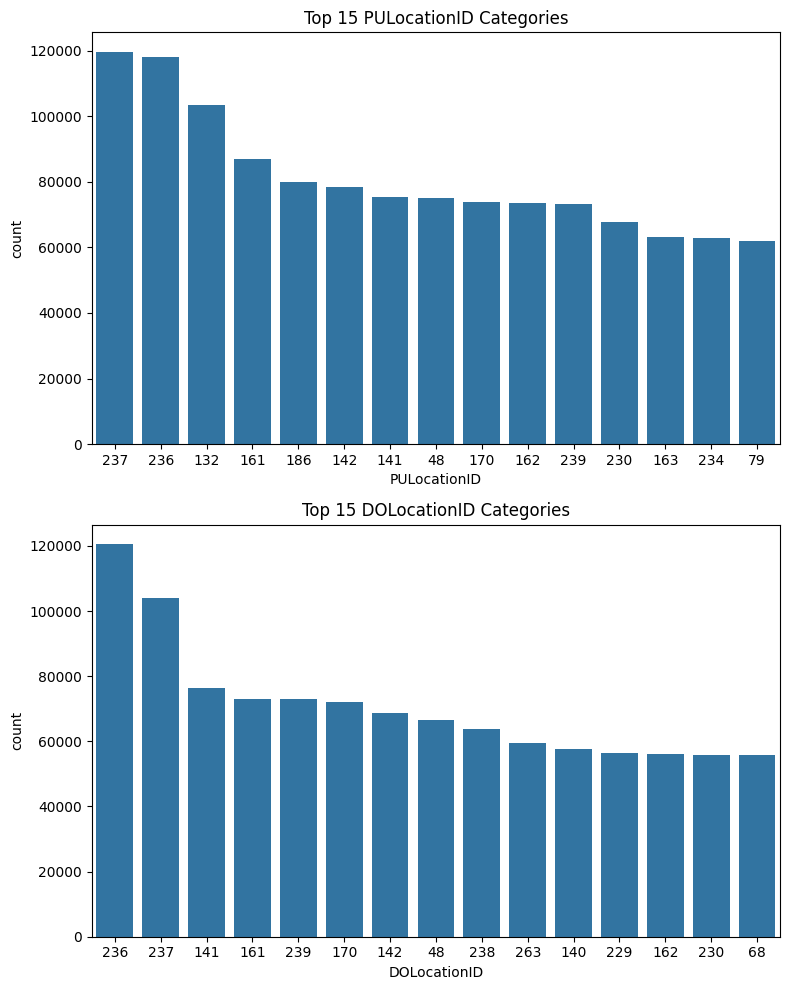

In [ ]:
# Create a Seaborn countplot for PULocationID and DOLocationID. Only plot the top 15 categories by value counts.


# get the top 15 PULocationID and DOLocationID categories
top_15_PU = df['PULocationID'].value_counts().index[:15]
top_15_DO = df['DOLocationID'].value_counts().index[:15]

# create figure with two subplots arranged vertically stacked
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# countplot for PULocationID
sns.countplot(data=df[df['PULocationID'].isin(top_15_PU)], x='PULocationID', order=top_15_PU, ax=ax[0])
ax[0].set_title('Top 15 PULocationID Categories')

# countplot for DOLocationID
sns.countplot(data=df[df['DOLocationID'].isin(top_15_DO)], x='DOLocationID', order=top_15_DO, ax=ax[1])
ax[1].set_title('Top 15 DOLocationID Categories')


plt.tight_layout()

# confirm/identify the most popular pick-up location
most_popular_PU = df['PULocationID'].value_counts().idxmax()
print(f"The most popular pick-up location is {most_popular_PU}\n\n")

A box plot, also known as a box-and-whisker plot, is a powerful visualization tool for displaying the distribution, variability, and outliers within a numerical dataset. It provides a concise summary of key statistical measures and offers several important uses:

  - Data Distribution and Skewness: Box plots offer a visual representation of the distribution of numerical data, providing insights into its central tendency, spread, and skewness. The box represents the interquartile range (IQR), which contains the middle 50% of the data, with the median indicated by a horizontal line within the box. By observing the length and symmetry of the box, analysts can assess whether the data is skewed or symmetrically distributed.

  - Outlier Detection: Box plots are highly effective in identifying outliers, which are data points that deviate significantly from the rest of the distribution. The whiskers of the plot extend to the minimum and maximum non-outlier values, with any data points beyond the whiskers considered as potential outliers. Outliers can indicate data errors, anomalies, or important observations requiring further investigation.

  - Comparing Groups or Categories: Box plots are useful for comparing the distributions of numerical data across different groups or categories. By creating side-by-side or grouped box plots, analysts can easily compare the central tendencies, spreads, and shapes of distributions between different groups. This allows for the identification of differences, similarities, or patterns within the data.

  - Variability and Spread: Box plots provide insights into the variability and spread of the data. The length of the box indicates the spread of the middle 50% of the data, while the whiskers show the range of non-outlier values. By comparing the lengths of the boxes and whiskers, analysts can assess the relative variability between different groups or categories, aiding in the understanding of the data's dispersion.

  - Skewedness and Symmetry: Box plots offer a visual assessment of the skewness or symmetry of the data distribution. A symmetrical distribution is represented by a box plot with an equal length on both sides of the median, while a skewed distribution is indicated by a longer box on one side. This visual cue helps in understanding the shape and characteristics of the data, assisting in further analysis and modeling decisions.

  - Data Range and Quartiles: Box plots display the quartiles of the data distribution. The lower quartile (Q1) represents the 25th percentile, the upper quartile (Q3) represents the 75th percentile, and the interquartile range (IQR) is the range between Q1 and Q3. These quartiles provide a summary of the range and spread of the central portion of the data, aiding in the understanding of the data's variability and dispersion.

Your task is:

  1. Use Seaborn's [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to discern the relationship between payment_type and total_amount. Does anything look weird? Can you explain what's going on?

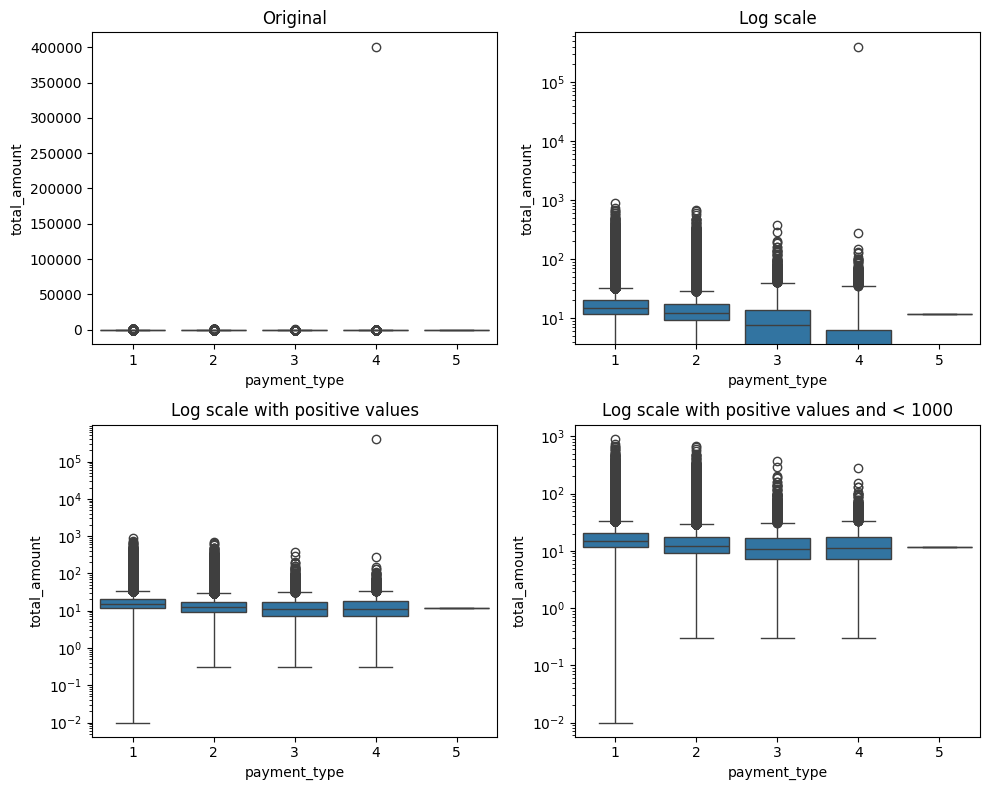

In [ ]:
# Create a box plot of total amount by payment type. Do you see anything odd?

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
# original
sns.boxplot(x='payment_type', y='total_amount', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Original')

# boxplot with log scale
sns.boxplot(x='payment_type', y='total_amount', data=df, ax=axs[0, 1])
axs[0, 1].set_yscale('log')
axs[0, 1].set_title('Log scale')

# boxplot with log scale and positive values
df_positive = df[df['total_amount'] > 0]
sns.boxplot(x='payment_type', y='total_amount', data=df_positive, ax=axs[1, 0])
axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Log scale with positive values')

# boxplot with log scale, positive values, and less than 1000
df_filtered = df[(df['total_amount'] > 0) & (df['total_amount'] < 1000)]
sns.boxplot(x='payment_type', y='total_amount', data=df_filtered, ax=axs[1, 1])
axs[1, 1].set_yscale('log')
axs[1, 1].set_title('Log scale with positive values and < 1000')

plt.tight_layout()

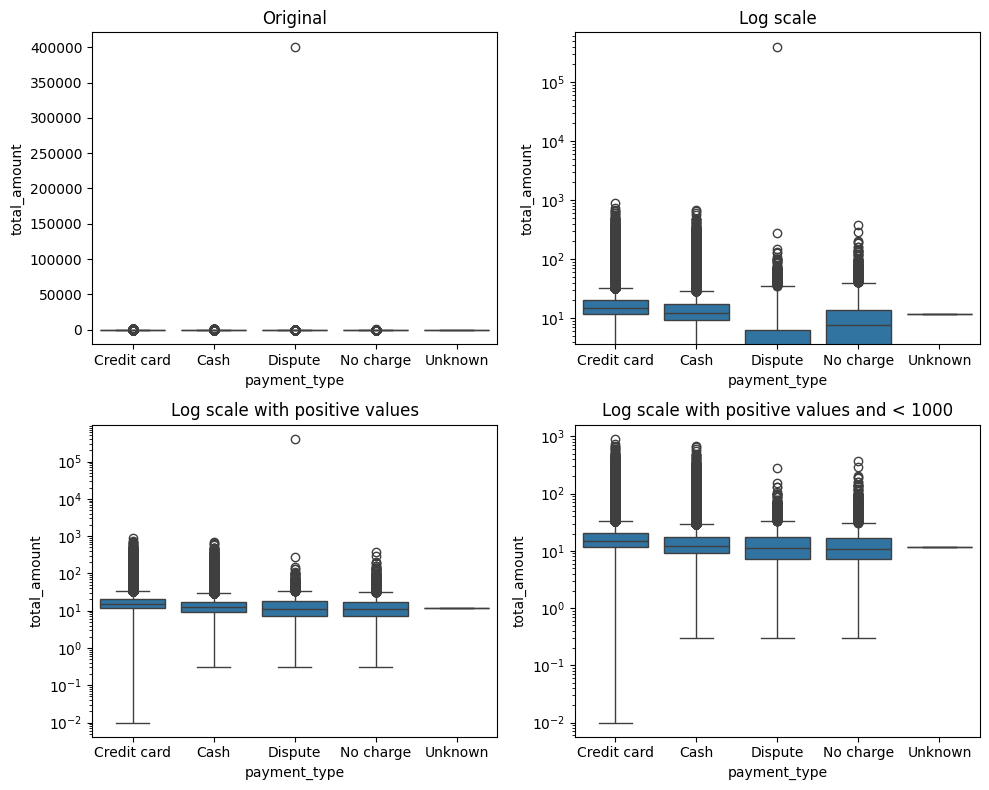

In [ ]:
# Create a box plot of total amount by payment type. Do you see anything odd?

# Define the payment type dictionary
payment_dict = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'}

# Replace the numeric payment types with their descriptions
df['payment_type'] = df['payment_type'].replace(payment_dict)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# original
sns.boxplot(x='payment_type', y='total_amount', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Original')

# log scale
sns.boxplot(x='payment_type', y='total_amount', data=df, ax=axs[0, 1])
axs[0, 1].set_yscale('log')
axs[0, 1].set_title('Log scale')

# log scale and positive values
df_positive = df[df['total_amount'] > 0]
sns.boxplot(x='payment_type', y='total_amount', data=df_positive, ax=axs[1, 0])
axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Log scale with positive values')

# log scale, positive values, and less than 1000
df_filtered = df[(df['total_amount'] > 0) & (df['total_amount'] < 1000)]
sns.boxplot(x='payment_type', y='total_amount', data=df_filtered, ax=axs[1, 1])
axs[1, 1].set_yscale('log')
axs[1, 1].set_title('Log scale with positive values and < 1000')


plt.tight_layout()

## Box Plot Analysis

The data's right-skewed appearance indicates that most payments are on the lower side, with a few exceptionally high payments. A log transformation was required to compress the data and to make distribution's shape more visible.

**Observations**:

- Most payment types have a majority of payments with relatively low amounts.
- However, there are a few payments that are exceptionally high, well above the typical range.
- The distribution of payments appears stretched out to the right, indicating a right-skewed pattern.
- Notably, there are numerous outliers with very high payment amounts, which may indicate unusual or erroneous transactions.



---



A histogram is a graphical representation that displays the distribution of a continuous or discrete numerical variable. It provides insights into the underlying data distribution and helps uncover patterns, frequencies, and ranges within the dataset. Here are some key uses and benefits of histogram plots:

  - Data Distribution: Histograms allow analysts to visualize the shape, central tendency, and spread of the data. They provide an overview of the data distribution, helping to identify if it follows a particular pattern, such as a normal distribution, skewed distribution, bimodal distribution, or multimodal distribution. Understanding the data distribution aids in selecting appropriate analysis techniques and understanding the characteristics of the data.

  - Frequency Analysis: Histograms display the frequency or count of data points within predefined bins or intervals along the x-axis. By observing the height or count of each bin, analysts can identify the frequency of occurrence for different values or value ranges. This information helps assess the concentration of data points and identify peaks or modes in the distribution.

  - Outlier Detection: Histograms can assist in identifying outliers, which are data points that significantly deviate from the rest of the distribution. Outliers may indicate data errors, unusual observations, or important anomalies requiring further investigation. By examining the tails or extreme values in the histogram, analysts can identify potential outliers that may require additional scrutiny.

  - Data Range and Spread: Histograms provide insights into the range and spread of the data. The x-axis represents the variable's values, while the y-axis represents the frequency or count of occurrences. By observing the width and span of the histogram, analysts can assess the data's range and variability. This information helps understand the data's spread and aids in subsequent analysis or decision-making processes.

  - Feature Engineering: Histograms can guide feature engineering processes by informing appropriate transformations, binning strategies, or encoding techniques for numerical variables. They assist in identifying nonlinear relationships or determining optimal cut-off points for converting continuous variables into categorical ones. Histograms also help identify data skewness and guide transformation methods to address the skew if necessary.

  - Data Quality Inspection: Histograms can be useful in detecting data quality issues or anomalies. Unusual spikes, gaps, or unexpected patterns in the histogram may indicate data entry errors, measurement inconsistencies, or missing data. By observing the histogram, analysts can identify potential data quality issues that require further investigation or preprocessing.

Your task is:

  1. Use Seaborn's [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to explore the data distributions for fare_amount, trip_distance, and extra. Use kernel density estimators to better visualize the distribution. Use sampling if you run into any memory issues.

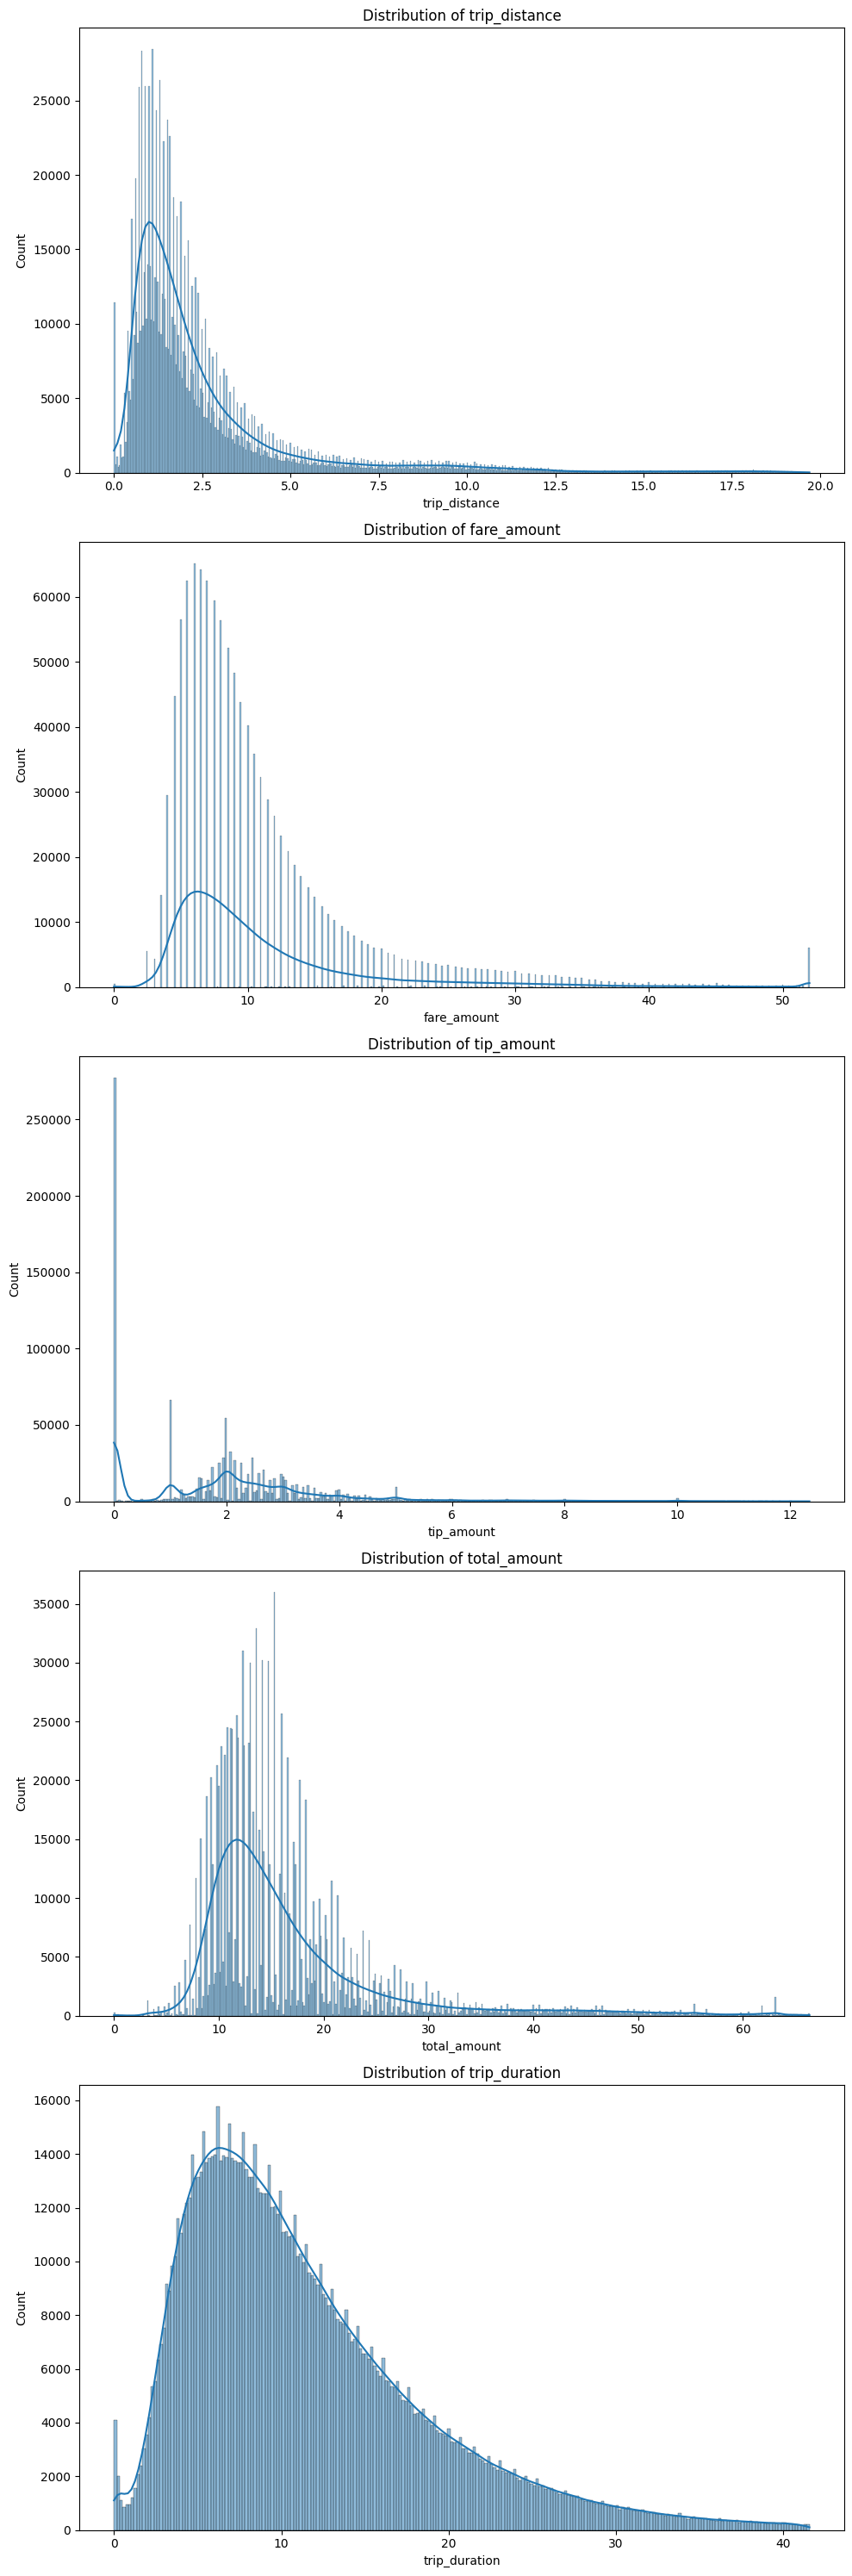

In [ ]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot. Sample the data if you run into memory issues.

# Sample the dataset
df_sample = df.sample(frac=0.5, random_state=1)

# Select the columns to include in the histograms
cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']

# remove negative values
for col in cols:
    df_sample = df_sample[df_sample[col] >= 0]

# remove remaining extreme values
q = 0.99  # change this to choose the cutoff for extreme values
for col in cols:
    upper_limit = df_sample[col].quantile(q)
    df_sample = df_sample[df_sample[col] <= upper_limit]

# 5x1 subplot
fig, axs = plt.subplots(5, 1, figsize=(10, 30))

for i, col in enumerate(cols):
    # Create the histogram with a kernel density estimate
    sns.histplot(data=df_sample, x=col, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')

# Display the plots
plt.tight_layout()